# **Week 3 notebook**

### **Exercise 7.1:**

<img src="SymPyBilleder/2025-09-15-08-46-37.png" width="550">

<img src="SymPyBilleder/2025-09-15-08-46-58.png" width="550">

http://todor66.com/olim/1988/Athletics/Women_Heptathlon.html

##### **1.**

In [9]:
olympic <- read.csv2("../data/heptathlon.csv")
head(olympic)

,Name,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Joyner_Kersee,(USA)",7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,"John,(GDR)",6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,"Behmer,(GDR)",6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,"Choubenkova,(URS)",6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,"Sablovskaite,(URS)",6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,"Schulz,(GDR)",6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


In [10]:
# We remove the Name column because it is not numeric
olympic$Name <- NULL
head(olympic)

,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7291,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,6897,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,6858,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,6540,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,6456,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,6411,13.75,1.83,13.50,24.65,6.33,42.82,125.79


Warning message:
"pakke 'car' blev bygget under R version 4.3.3"
Indlaeser kraevet pakke: carData



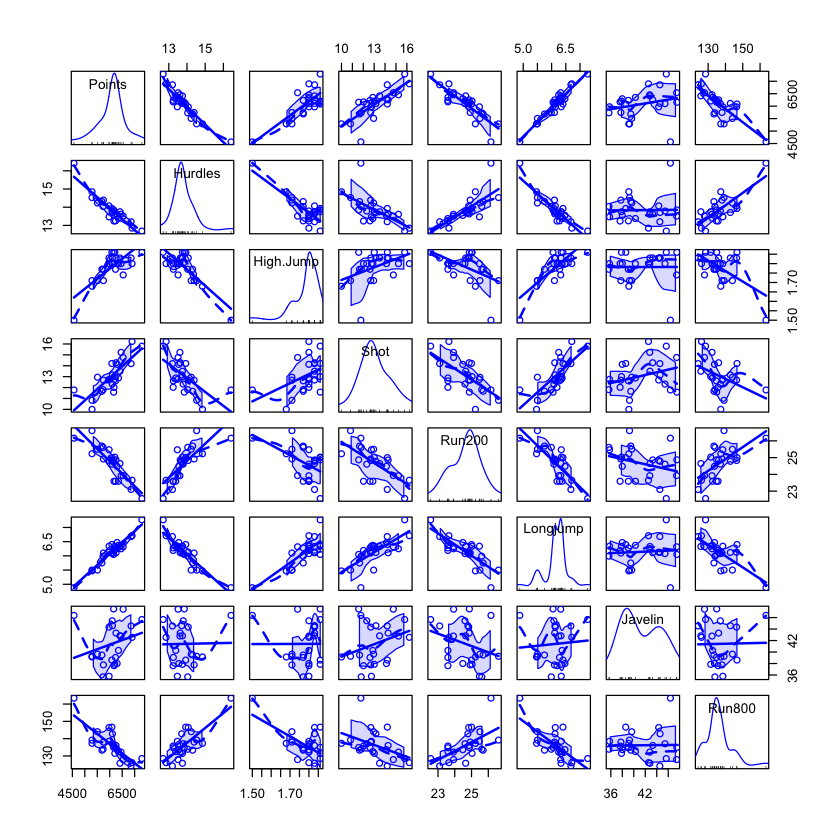

In [11]:
library(car)
scatterplotMatrix(olympic)

In [12]:
# We calculate the correlation matrix:
cor(olympic)

,Points,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
Points,1.0000000,-0.92441444,0.771244026,0.7819772,-0.8623581,0.95477022,0.248199746,-0.7740862
Hurdles,-0.9244144,1.00000000,-0.811402536,-0.6252580,0.7737205,-0.90321261,0.013541686,0.7691130
High.Jump,0.7712440,-0.81140254,1.000000000,0.4307521,-0.4876637,0.78222009,0.002874155,-0.5897750
Shot,0.7819772,-0.62525804,0.430752096,1.0000000,-0.6496633,0.73889970,0.298746305,-0.4179724
Run200,-0.8623581,0.77372054,-0.487663685,-0.6496633,1.0000000,-0.80345072,-0.288366078,0.6015774
Longjump,0.9547702,-0.90321261,0.782220090,0.7388997,-0.8034507,1.00000000,0.067205976,-0.6969807
Javelin,0.2481997,0.01354169,0.002874155,0.2987463,-0.2883661,0.06720598,1.000000000,0.0158585
Run800,-0.7740862,0.76911298,-0.589774958,-0.4179724,0.6015774,-0.69698069,0.015858499,1.0000000


From the plot and the correlation matrix, we see the different correlations across the numerous variables, with smoe being stronger than others.

For instance, we can see that the points are strongly positively correlated with longjump, meanwhile it is strongly negatively correlated with hurdles, run200 and run800.

##### **2.**

In [13]:
# First we filter the data to not include the points
olympic_filtered <- olympic[2:8]
head(olympic_filtered)

,Hurdles,High.Jump,Shot,Run200,Longjump,Javelin,Run800
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.69,1.86,15.80,22.56,7.27,45.66,128.51
2,12.85,1.80,16.23,23.65,6.71,42.56,126.14
3,13.20,1.83,14.20,23.10,6.68,44.54,124.20
4,13.51,1.74,14.76,23.93,6.32,47.46,127.90
5,13.61,1.80,15.23,23.92,6.25,42.78,132.24
6,13.75,1.83,13.50,24.65,6.33,42.82,125.79


In [14]:
# Now we do PCA:
olympic.pca <- princomp(scale(olympic_filtered))
summary(olympic.pca)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.0592024 1.0715333 0.69973030 0.66353002 0.52724889
Proportion of Variance 0.6309992 0.1708607 0.07286049 0.06551668 0.04136777
Cumulative Proportion  0.6309992 0.8018599 0.87472034 0.94023702 0.98160479
                           Comp.6     Comp.7
Standard deviation     0.27543380 0.21852242
Proportion of Variance 0.01128925 0.00710596
Cumulative Proportion  0.99289404 1.00000000

Here we see that 4 components are enough to explain more than $90\%$ of the variance in the data.

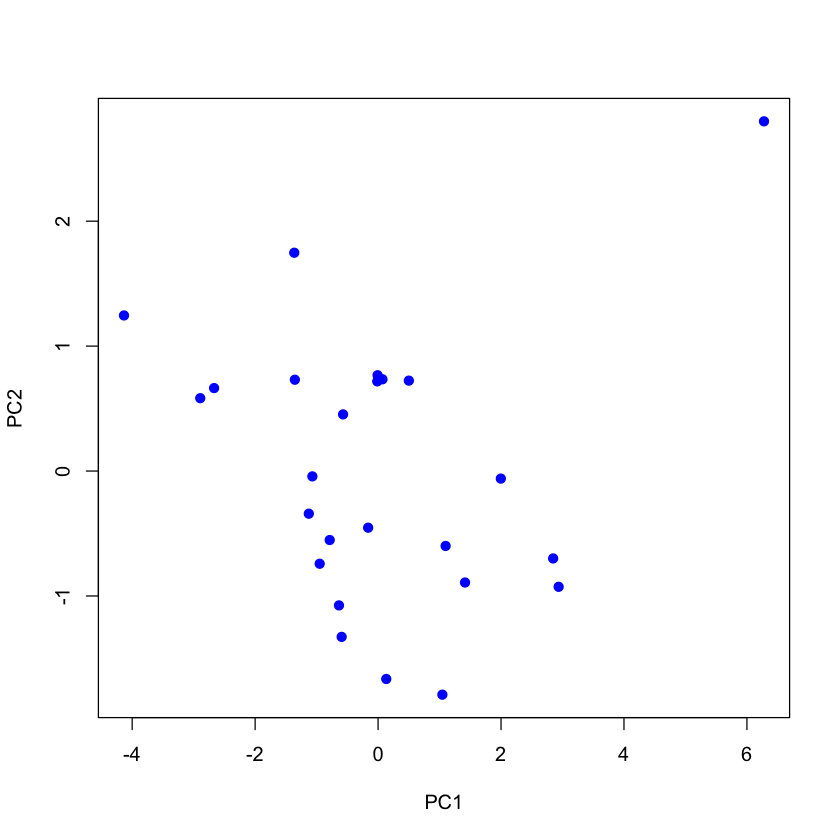

In [15]:
scores <- olympic.pca$scores

# Here is score plot of PC1 and PC2
plot(scores[,1], scores[,2], xlab = "PC1", ylab = "PC2", pch = 19, col = "blue")

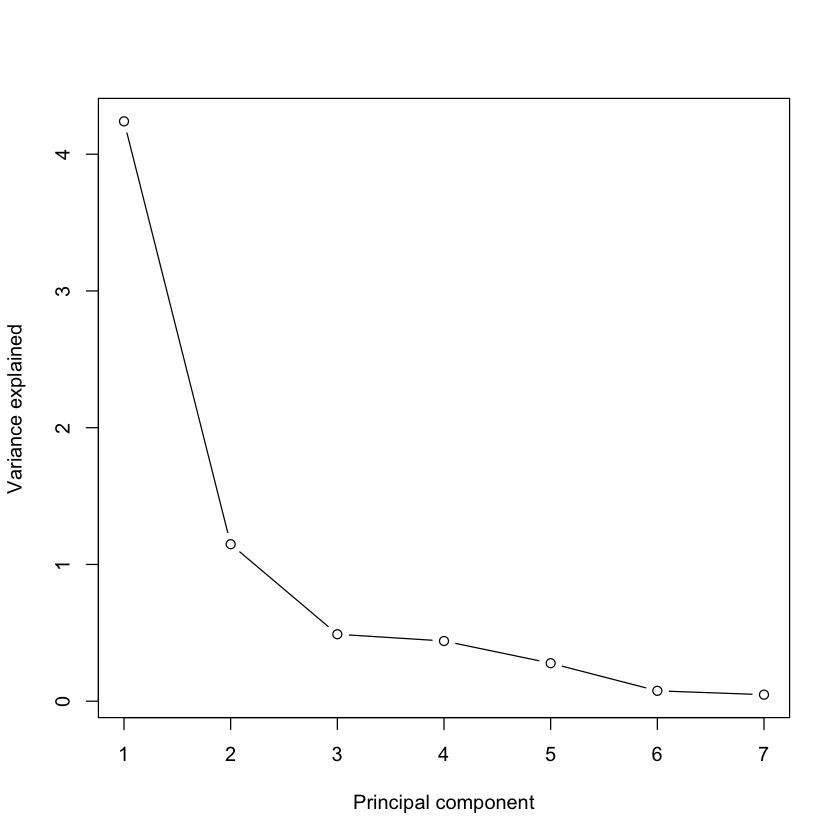

In [16]:
# We make elbow plot:
plot(1:7, olympic.pca$sdev^2, type = "b", xlab = "Principal component", ylab = "Variance explained")

From elbow plot I would say that 3 compoment is sufficient via the elbow drop.

##### **3.**

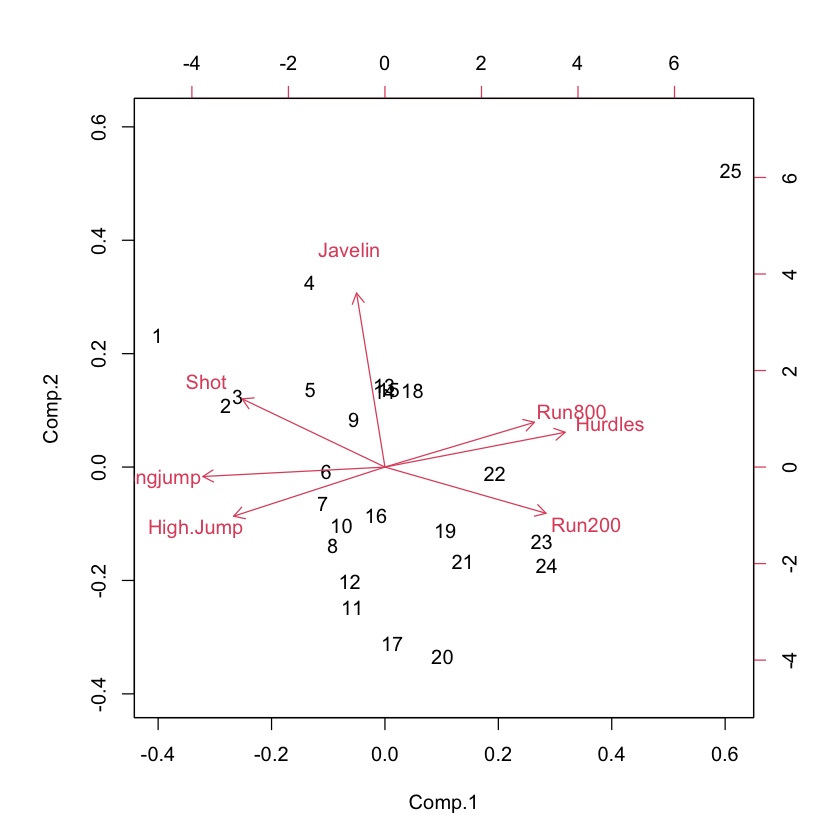

In [17]:
# We look at the loadings plot:
biplot(olympic.pca)

The first component captures most variables pretty strongly, exepct javelin. Here we have jumps and shot in negative direction while runs and hurdles are in positive. The second component captures mostly javelin, and all the others are weaker.

But generally, most variables do not exceed 0.5 in absolute value, so it is not because the PCA really explains them all so strongly.

### **Exercise 7.2:**

<img src="SymPyBilleder/2025-09-15-08-47-30.png" width="550">




##### **A.**

For the answer to 1. then I would say yes, as the correlatio matrix can give an idea of which variables are correlated before PCA is performed. This is important as PCA is based on the correlations between variables and we must see if there are on different scales. Especially if some other variables might dominate the PCA.


In [18]:
fit <- read.table("../data/Fitness.txt", header = TRUE)
head(fit)

,Age,Weight,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,44,89.47,44.609,11.37,62,178,182
2,40,75.07,45.313,10.07,62,185,185
3,44,85.84,54.297,8.65,45,156,168
4,42,68.15,59.571,8.17,40,166,172
5,38,89.02,49.874,9.22,55,178,180
6,47,77.45,44.811,11.63,58,176,176


In [19]:
# Now for PCA:
fit.pca <- princomp(scale(fit))
summary(fit.pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.6760009 1.3299039 0.9571174 0.8599568 0.61198903
Proportion of Variance 0.4146588 0.2610856 0.1352299 0.1091681 0.05528785
Cumulative Proportion  0.4146588 0.6757444 0.8109743 0.9201424 0.97543026
                           Comp.6      Comp.7
Standard deviation     0.35668287 0.198034150
Proportion of Variance 0.01878049 0.005789254
Cumulative Proportion  0.99421075 1.000000000

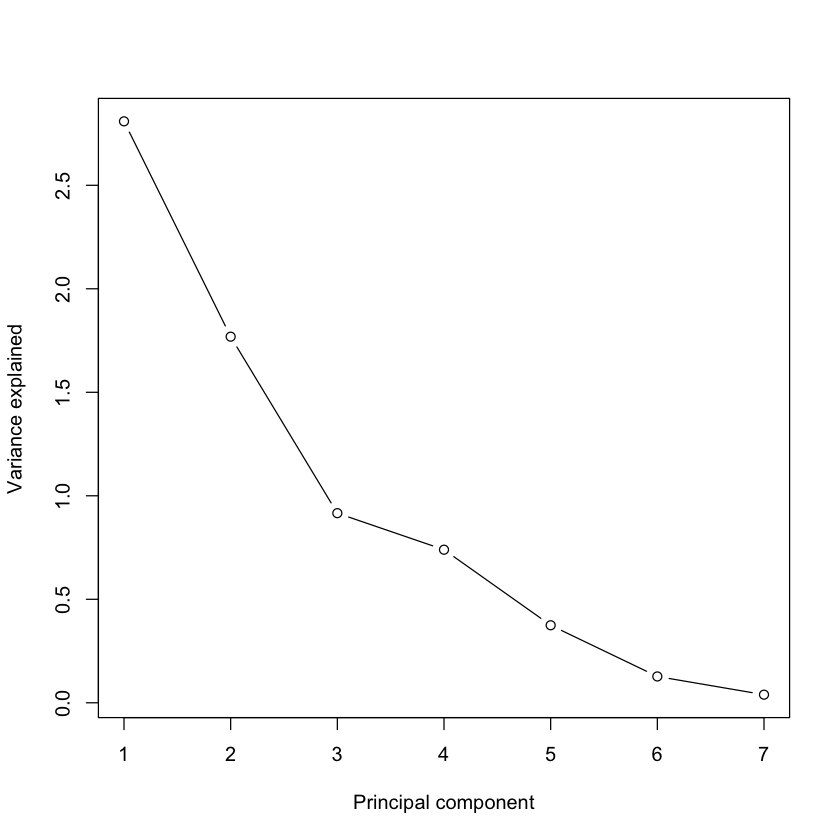

In [20]:
# We make elbow plot:
plot(1:7, fit.pca$sdev^2, type = "b", xlab = "Principal component", ylab = "Variance explained")

In [21]:
cor(fit)

,Age,Weight,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
Age,1.0000000,-0.23353903,-0.3045924,0.1887453,-0.16409995,-0.3378703,-0.4329159
Weight,-0.2335390,1.00000000,-0.1627528,0.1435076,0.04397417,0.1815163,0.2493812
Oxygen,-0.3045924,-0.16275285,1.0000000,-0.8621949,-0.39935611,-0.3979742,-0.2367402
Runtime,0.1887453,0.14350758,-0.8621949,1.0000000,0.45038260,0.3136478,0.2261030
RestPulse,-0.1640999,0.04397417,-0.3993561,0.4503826,1.00000000,0.3524606,0.3051240
RunPulse,-0.3378703,0.18151633,-0.3979742,0.3136478,0.35246060,1.0000000,0.9297538
MaxPulse,-0.4329159,0.24938123,-0.2367402,0.2261030,0.30512400,0.9297538,1.0000000


Here I would say we use 4 components via the elbow rule.

##### **B.**

In [22]:
fit_new <- read.table("../data/Fitness.txt", header = TRUE)
fit_new$Age <- NULL
fit_new$Weight <- NULL

head(fit_new)

,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
,<dbl>,<dbl>,<int>,<int>,<int>
1,44.609,11.37,62,178,182
2,45.313,10.07,62,185,185
3,54.297,8.65,45,156,168
4,59.571,8.17,40,166,172
5,49.874,9.22,55,178,180
6,44.811,11.63,58,176,176


In [23]:
fit_new.pca <- princomp(scale(fit_new))
summary(fit_new.pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4      Comp.5
Standard deviation     1.6468049 1.1353134 0.8063133 0.3800511 0.207910298
Proportion of Variance 0.5604731 0.2663802 0.1343625 0.0298507 0.008933516
Cumulative Proportion  0.5604731 0.8268533 0.9612158 0.9910665 1.000000000

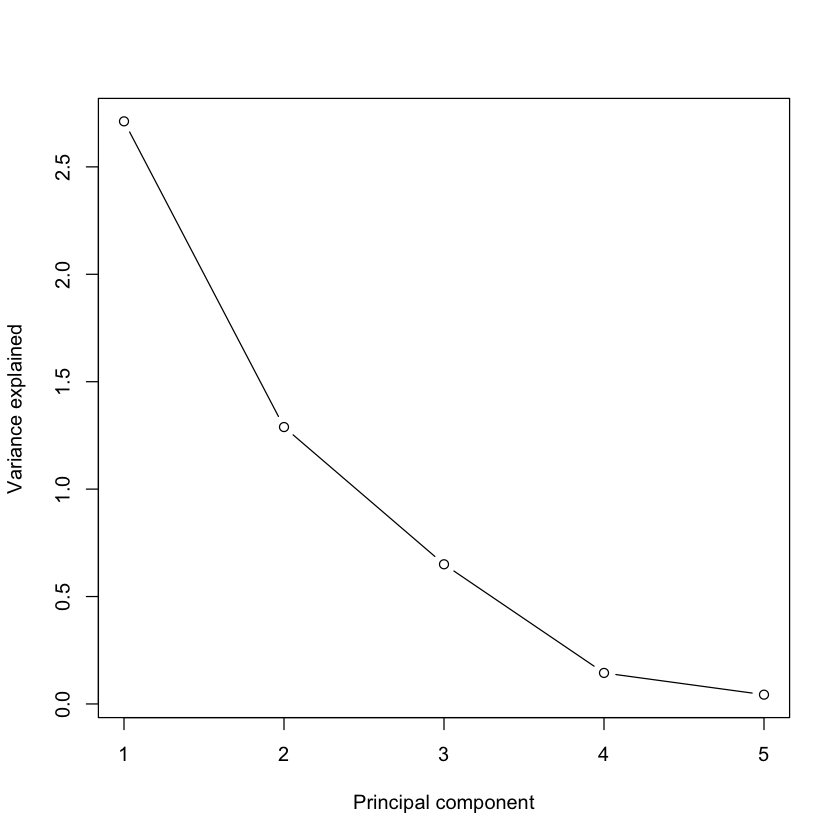

In [24]:
# We make elbow plot:
plot(1:5, fit_new.pca$sdev^2, type = "b", xlab = "Principal component", ylab = "Variance explained")

In [25]:
# We also find the correlations:
cor(fit_new)

,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
Oxygen,1.0000000,-0.8621949,-0.3993561,-0.3979742,-0.2367402
Runtime,-0.8621949,1.0000000,0.4503826,0.3136478,0.2261030
RestPulse,-0.3993561,0.4503826,1.0000000,0.3524606,0.3051240
RunPulse,-0.3979742,0.3136478,0.3524606,1.0000000,0.9297538
MaxPulse,-0.2367402,0.2261030,0.3051240,0.9297538,1.0000000


Now we get less components, and the plot shows that 3 components are enough.

##### **C.**

In [26]:
library(ppcor)

pc <- pcor(fit, method = "pearson") # fit must include all variables

# Now extract the partial correlations among the variables of interest:
pc$estimate[c("Oxygen","Runtime","RestPulse","RunPulse","MaxPulse"),
            c("Oxygen","Runtime","RestPulse","RunPulse","MaxPulse")]

Warning message:
"pakke 'ppcor' blev bygget under R version 4.3.3"
Indlaeser kraevet pakke: MASS



,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
Oxygen,1.00000000,-0.8128033,-0.066397457,-0.53274747,0.412977008
Runtime,-0.81280330,1.0000000,0.195796093,-0.33624405,0.288923270
RestPulse,-0.06639746,0.1957961,1.000000000,0.04616935,-0.007107243
RunPulse,-0.53274747,-0.3362441,0.046169346,1.00000000,0.924466650
MaxPulse,0.41297701,0.2889233,-0.007107243,0.92446665,1.000000000


The differences between the ordinary and partial correlation matrices are not huge for the strongest relationships (Oxygen–Runtime, RunPulse–MaxPulse), but some weaker correlations (like those involving RestPulse or Oxygen–MaxPulse) change noticeably.

This means that the variables Age and Weight have some influence, but they do not fundamentally alter the main correlation structure of the fitness variables.

In other words, Age and Weight do not drive the dominant patterns in the data, so excluding them (as in part B) or conditioning on them (as in part C) leads to broadly similar PCA results.

##### **D.**

In [27]:
# First we get the correlation matrix:

cor(fit)

,Age,Weight,Oxygen,Runtime,RestPulse,RunPulse,MaxPulse
Age,1.0000000,-0.23353903,-0.3045924,0.1887453,-0.16409995,-0.3378703,-0.4329159
Weight,-0.2335390,1.00000000,-0.1627528,0.1435076,0.04397417,0.1815163,0.2493812
Oxygen,-0.3045924,-0.16275285,1.0000000,-0.8621949,-0.39935611,-0.3979742,-0.2367402
Runtime,0.1887453,0.14350758,-0.8621949,1.0000000,0.45038260,0.3136478,0.2261030
RestPulse,-0.1640999,0.04397417,-0.3993561,0.4503826,1.00000000,0.3524606,0.3051240
RunPulse,-0.3378703,0.18151633,-0.3979742,0.3136478,0.35246060,1.0000000,0.9297538
MaxPulse,-0.4329159,0.24938123,-0.2367402,0.2261030,0.30512400,0.9297538,1.0000000


First for, for instance, oxygen and runtime given weight:
$$
\rho_{34|2} = \frac{\rho_{34} - \rho_{32}\rho_{42}}{\sqrt{(1-\rho_{32}^2)(1-\rho_{42}^2)}}
$$
This becomes:
$$
= \frac{-0.86-(-0.16)(0.14)}{\sqrt{(1-(-0.16)^2)(1-(0.14)^2)}} = -0.85
$$
This is close to $-0.82$ from the R code, because remember that we rounded the numbers. Furthermore, we can also try with runtime and maxpulse:
$$
\rho_{47|2} = \frac{\rho_{47} - \rho_{42}\rho_{72}}{\sqrt{(1-\rho_{42}^2)(1-\rho_{72}^2)}}
$$
This becomes:
$$
= \frac{0.23-(0.14)(0.25)}{\sqrt{(1-(0.14)^2)(1-(0.25)^2)}} = 0.19
$$
For the signifigantly different from $0$ problem, we use the formula:
$$
\frac{R}{\sqrt{(1-R^2)}}\sqrt{n-2-(p-m)} \sim t(n-2-(p-m))
$$
We must find $n$ which is number of rows in fitness dataset.

In [ ]:
length(fit$Oxygen) # Just an example because all variables have same length.

[1] 31

We insert all values, we test for $-0.85$:
$$
\frac{-0.85}{\sqrt{(1-(-0.85)^2)}}\sqrt{31-2-(31-29)} = -10.49
$$
The absolout value is $10.49$ and the critical value for $t(28)$ at $5\%$ level is around $2.048$. So we reject the null hypothesis and conclude that the partial correlation is significantly different from $0$.

In [31]:
# Here is how we found the t(28) value in R:
qt(0.975, df=28) # two-tailed 5% significance level

[1] 2.048407

### **Exercise 7.3:**

<img src="SymPyBilleder/2025-09-15-08-48-29.png" width="550">

<img src="SymPyBilleder/2025-09-15-08-48-40.png" width="550">

In [32]:
# First we read the data:
beef <- read.csv2("../data/beef.csv")
head(beef)

,pH,Water,Protein,EtherExt,Hydroxy,CollaSol,Lightn,Hue,DripLoss,CookLoss,WBshear,Appear,EaseSink,Friabil,Residue,InJuice,SusJuice,OvAcc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.00,0.09,0.28,-0.28,-0.33,-0.08,-0.02,-0.33,0.01,-0.38,-0.26,0.100,0.17,0.10,0.08,0.080,0.010,0.13
2,0.09,1.00,-0.40,-0.16,-0.08,-0.01,0.03,-0.23,0.18,0.15,-0.01,-0.003,-0.16,-0.17,-0.19,-0.080,-0.090,-0.13
3,0.28,-0.40,1.00,-0.56,-0.55,-0.03,0.34,-0.47,-0.07,-0.64,-0.63,0.250,0.27,0.20,0.23,0.030,-0.004,0.21
4,-0.28,-0.16,-0.56,1.00,0.59,0.05,-0.31,0.40,0.08,0.44,0.42,-0.420,-0.11,-0.09,-0.13,-0.004,-0.010,-0.09
5,-0.33,-0.08,-0.55,0.59,1.00,0.16,-0.48,0.62,-0.12,0.66,0.72,-0.330,-0.26,-0.22,-0.24,-0.050,-0.020,-0.22
6,-0.08,-0.01,-0.03,0.05,0.16,1.00,-0.02,-0.03,-0.10,-0.01,-0.03,-0.190,0.01,0.06,-0.02,0.050,0.030,0.07


##### **1.**

In [33]:
# Now we do PCA:
beef.pca <- princomp(scale(beef))
summary(beef.pca)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     3.1175277 1.8121750 1.07838030 0.98574571 0.89576558
Proportion of Variance 0.5717047 0.1931752 0.06840612 0.05715851 0.04719976
Cumulative Proportion  0.5717047 0.7648799 0.83328598 0.89044448 0.93764425
                           Comp.6     Comp.7      Comp.8      Comp.9
Standard deviation     0.76812329 0.42971998 0.347561842 0.256333359
Proportion of Variance 0.03470667 0.01086231 0.007105837 0.003865105
Cumulative Proportion  0.97235092 0.98321323 0.990319063 0.994184168
                           Comp.10     Comp.11      Comp.12      Comp.13
Standard deviation     0.237450645 0.136055219 0.1134517909 0.0845441402
Proportion of Variance 0.003316636 0.001088884 0.0007571358 0.0004204536
Cumulative Proportion  0.997500804 0.998589688 0.9993468234 0.9997672770
                            Comp.14      Comp.15      Comp.16      Comp.17
Standard deviation     0.04

The first four PCs explain $89\%$ of the total variance.

##### **2.**

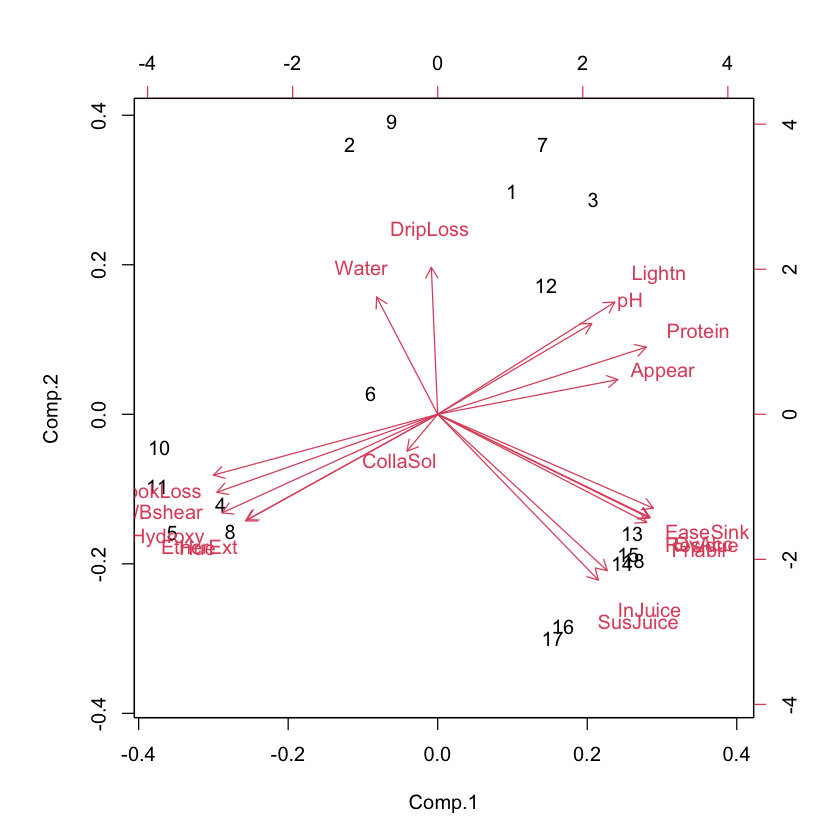

In [ ]:
# Now we make the loading plot of the first two.
biplot(beef.pca)

We see how ease protein, friability and susjuice dominate in positive direction, and how cookloss and WBshear dominate in the negative directe for PC 1. Meanwhile ,for PC 2 we have water and driploss strongly in positive direction, and then in juice and susjuice in negative direction.

##### **3.**

In [38]:
cor(beef)

,pH,Water,Protein,EtherExt,Hydroxy,CollaSol,Lightn,Hue,DripLoss,CookLoss,WBshear,Appear,EaseSink,Friabil,Residue,InJuice,SusJuice,OvAcc
pH,1.00000000,0.054500190,0.67207317,-0.69259086,-0.727491368,-0.17609513,0.40773247,-0.75504636,0.045423918,-0.73363703,-0.67300628,0.417283980,0.42491516,0.36146713,0.36490065,0.24293138,0.1706752,0.3837817
Water,0.05450019,1.000000000,-0.36338652,-0.05741982,0.008701333,-0.04805457,-0.03988079,-0.12563075,0.368018590,0.20166994,0.10114134,-0.136336752,-0.37096292,-0.38632976,-0.39149485,-0.33572583,-0.3514095,-0.3578519
Protein,0.67207317,-0.363386517,1.00000000,-0.85507886,-0.893986920,-0.08031465,0.76491325,-0.81357377,0.007838290,-0.93575338,-0.91214782,0.673208399,0.63784533,0.58943960,0.60755472,0.36391956,0.3178682,0.6009798
EtherExt,-0.69259086,-0.057419821,-0.85507886,1.00000000,0.903045164,0.14093799,-0.75415435,0.79088576,-0.057054286,0.82849109,0.83572939,-0.778734318,-0.50179191,-0.46007831,-0.48423208,-0.27311317,-0.2439113,-0.4807400
Hydroxy,-0.72749137,0.008701333,-0.89398692,0.90304516,1.000000000,0.18250202,-0.86142227,0.90676489,-0.220658712,0.94282689,0.96444765,-0.742053510,-0.64720551,-0.59907597,-0.61647648,-0.37576013,-0.3279952,-0.6203013
CollaSol,-0.17609513,-0.048054574,-0.08031465,0.14093799,0.182502024,1.00000000,-0.13914690,-0.00746892,-0.238642242,0.04105835,0.05269947,-0.373199255,-0.07164541,-0.04947645,-0.09652625,-0.02226809,-0.0458593,-0.0492919
Lightn,0.40773247,-0.039880793,0.76491325,-0.75415435,-0.861422268,-0.13914690,1.00000000,-0.71623818,0.343899326,-0.81248358,-0.86866878,0.700147103,0.48208796,0.45008005,0.47009556,0.17350341,0.1544993,0.4673616
Hue,-0.75504636,-0.125630745,-0.81357377,0.79088576,0.906764889,-0.00746892,-0.71623818,1.00000000,-0.259321311,0.90516340,0.91956233,-0.463669284,-0.57218565,-0.51044049,-0.51221906,-0.32183589,-0.2405798,-0.5386517
DripLoss,0.04542392,0.368018590,0.00783829,-0.05705429,-0.220658712,-0.23864224,0.34389933,-0.25932131,1.000000000,-0.07597322,-0.18292761,-0.000553886,-0.17247090,-0.20125615,-0.18883328,-0.34842322,-0.3792828,-0.1896567
CookLoss,-0.73363703,0.201669936,-0.93575338,0.82849109,0.942826890,0.04105835,-0.81248358,0.90516340,-0.075973220,1.00000000,0.97144521,-0.654885067,-0.73870237,-0.69226761,-0.70054658,-0.47571582,-0.4197247,-0.7111048


The PCA results are directly related to the correlation matrix, since PCA is based on it.

Variables that are strongly correlated (like Protein, Lightness, Appearance, EaseSink, Residue, OvAcc) load together on the same component. In contrast, groups of variables with strong negative correlations (like Protein versus EtherExt, Hydroxy and WBshear) show up as opposites on PC 1. 

This explains why PC 1 mainly reflects a contrast between meat quality and like sensory traits and toughness and fat content. PC 2 captures smaller, secondary correlations (Water and DripLoss).

##### **4.**

Since PCA summarizes the variation through the correlation structure, variables that do not load strongly on the first few PCs (like Water, CollaSol and drip loss (both around 0 for both components)) can be considered less informative and may be excluded.

Next up, variables with extremely high correlations (like EaseSink, Friabil, Residue, OvAcc and InJuice and SusJuice) are redundant, and only one from each highly correlated group is needed in future studies. This would reduce measurement cost without losing information.

### **Exercise 7.4:**

<img src="SymPyBilleder/2025-09-15-08-48-58.png" width="550">

##### **1.**

We find the eigenvalues via R.

In [3]:
Sigma <- matrix(c(1,0.4,0.4,
                  0.4,1,0.4,
                  0.4,0.4,1), nrow=3, byrow=TRUE)
ev <- eigen(Sigma)
ev$values      
ev$vectors  

[1] 1.8 0.6 0.6

-0.5773503,-0.4323833,0.69261196
-0.5773503,-0.3836279,-0.72076093
-0.5773503,0.8160112,0.02814897


In [ ]:
# fraction explained by first component
ev$values[1] / sum(ev$values) # Which is just the total variance (sum of all eigenvalues) divided by the first component.

[1] 0.6

##### **2.**

The first principal component is essentially the overall tendency to be dishonest across the three situations  a general dishonesty factor (all three situations load positively and equally). It captures the common behaviour that affects copying, helping (dishonestly), and looking over the shoulder.

# **Slide C in R code**

19.53,3.96,-145.81
3.96,1.24,-51.86
-145.81,-51.86,7126.19


19.5364,3.8896,-150.28
3.8896,1.2100,-52.36
-150.2800,-52.3600,7225.00


Warning message:
"pakke 'rgl' blev bygget under R version 4.3.3"


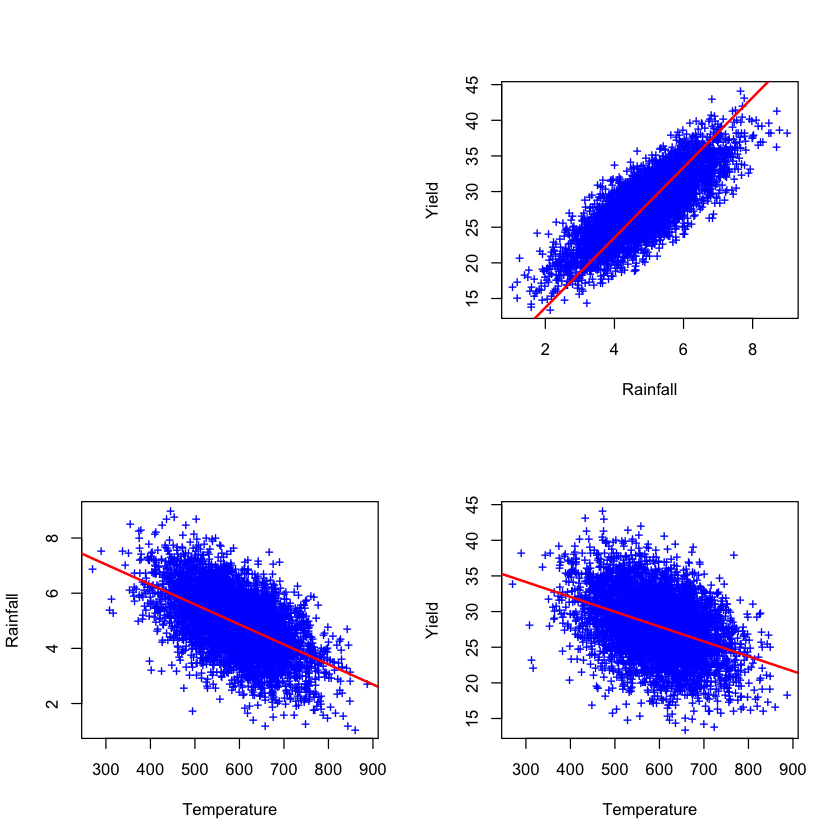

In [ ]:
# Slide 3:

Hay_var <- matrix(c(4.42^2,4.42*1.1*0.8,-4.42*85*0.4,
                   4.42*1.1*0.8,1.1^2,-1.1*85*0.56,
                   -4.42*85*0.4,-1.1*85*0.56,85^2),ncol=3)
Hay_means <- c(28.02,4.91,594)

my.eigen.values<-eigen(Hay_var)$values
my.eigen.vectors<-eigen(Hay_var)$vectors

# simulate data:
k<-5000
my.x<-cbind(rnorm(k),rnorm(k),rnorm(k))

my.y<-my.x%*%diag(sqrt(my.eigen.values))%*%t(my.eigen.vectors)+
      matrix(rep(Hay_means,each=k),ncol=3)

# check variance (compare with Hay_cor)
round(var(my.y),digits=2)
Hay_var

my.y<-as.data.frame(my.y)
names(my.y)<-c("yield","rainfall","temp")
par(mfrow=c(2,2))
frame()
plot(my.y$rainfall,my.y$yield,col="blue",pch="+",xlab="Rainfall",ylab="Yield")
temp<-matrix(nrow=2,ncol=101)
for(i in 0:101){
  temp[,i]<-Hay_means[1:2]+(i-51)*eigen(Hay_var[1:2,1:2])$vectors[,1]
  }
lines(temp[2,],temp[1,],type="l", col="red",lwd=2)
plot(my.y$temp,my.y$rainfall,col="blue",pch="+",xlab="Temperature",ylab="Rainfall")
temp<-matrix(nrow=2,ncol=101)
for(i in 0:101){
  temp[,i]<-Hay_means[2:3]+50*(i-51)*eigen(Hay_var[2:3,2:3])$vectors[,1]
  }
lines(temp[2,],temp[1,],type="l", col="red",lwd=2)
plot(my.y$temp,my.y$yield,col="blue",pch="+",xlab="Temperature",ylab="Yield")
temp<-matrix(nrow=2,ncol=101)
for(i in 0:101){
  temp[,i]<-Hay_means[c(1,3)]+50*(i-51)*eigen(Hay_var[c(1,3),c(1,3)])$vectors[,1]
  }
lines(temp[2,],temp[1,],type="l", col="red",lwd=2)
par(mfrow=c(1,1))

# 3d plot:
library(rgl)
plot3d(my.y, type = "s", size = 0.75, lit = FALSE,col="blue",pch="+")
rgl.snapshot("haydata.png", fmt = "png", top = TRUE )

,yield.given.rainfall,temp.given.rainfall
yield.given.rainfall,1.00000000,-0.02061121
temp.given.rainfall,-0.02061121,1.00000000


[1] 0.09656091

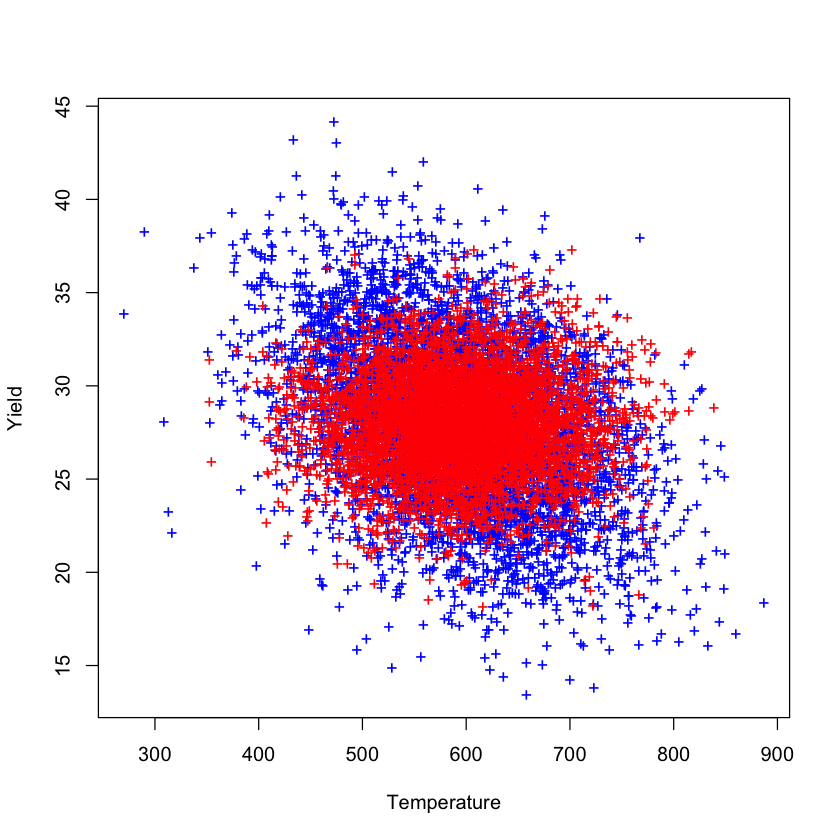

In [ ]:
# Slide 4:
# sampling from the conditional distribution,
# given rainfall at its mean:
yield.given.rainfall<-Hay_means[1]+
        sqrt(Hay_var[1,1]-Hay_var[1,2]^2/Hay_var[2,2])*rnorm(k)

temp.given.rainfall<-Hay_means[3]+
        sqrt(Hay_var[3,3]-Hay_var[3,2]^2/Hay_var[2,2])*rnorm(k)


plot(my.y$temp,my.y$yield,col="blue",pch="+",xlab="Temperature",ylab="Yield")
points(temp.given.rainfall,yield.given.rainfall,col="red",pch="+")

cov2cor(var(cbind(yield.given.rainfall,temp.given.rainfall)))

# theoretical correlation:

my.partial.var<-Hay_var[c(1,3),c(1,3)]-
  Hay_var[c(1,3),2]%*%solve(Hay_var[2,2])%*%Hay_var[2,c(1,3)]

cov2cor(my.partial.var)[1,2]

# 0.09656091

In [ ]:
# Slide 7:

n <- length(Fit$Oxygen)
p <-2 
shape <- var(Fit) 
center <- sapply(Fit,mean,1)

conf95 <- 
  sqrt(p * (n-1) * qf(0.95, p, n-p)/(n*(n-p))) 
pred95 <- sqrt(n+1)*rconf95 

library(car)
pred.elip95 <- 
car::ellipse(center, shape, pred95,draw = FALSE) 
conf.elip95 <- 
car::ellipse(center, shape, conf95,draw = FALSE) 

plot(pred.elip95, type='l', col = 2,lwd=2,xlab="Oxygen",ylab="Runtime") 
lines(conf.elip95, type='l', col = 3,lwd=2) 
points(Fit$Oxygen, Fit$Runtime,col=2) 
points(center[1],center[2],cex=2,pch=19,col=3) 

ERROR: Error in eval(expr, envir, enclos): objekt 'Fit' blev ikke fundet


[1] 0.8090408

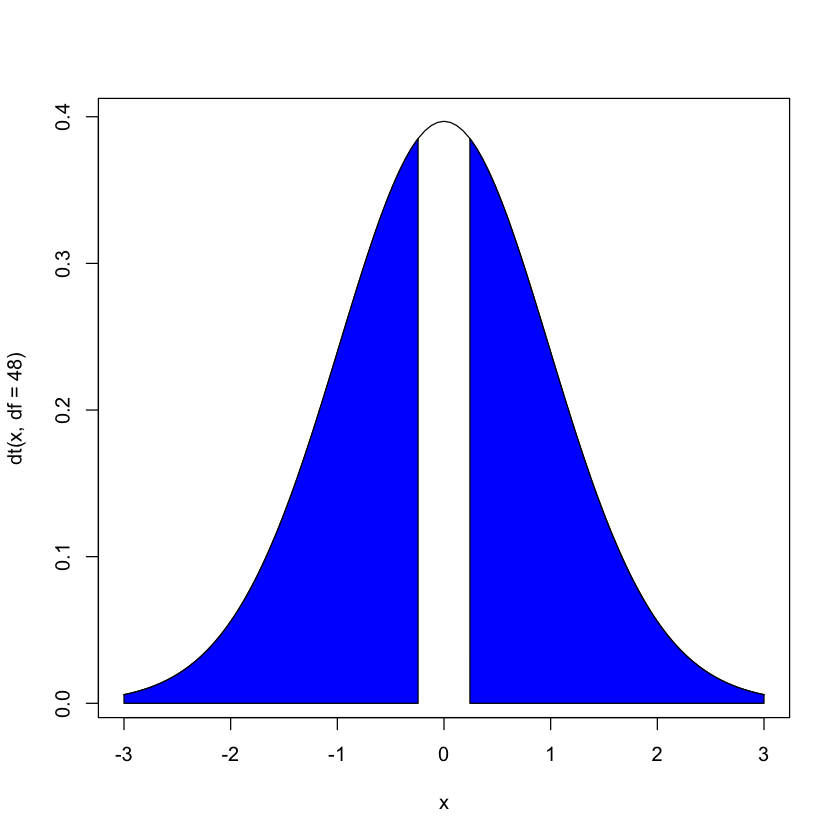

In [ ]:
# Slide 14:

2*pt(-0.243,df=48)

# p=0.81

curve(dt(x,df=48),-3,3)
polygon(c(-(3000:243)/1000,-243/1000,-3,-3),
        c(dt(-(3000:243)/1000,df=48),0,0,dt(-3,df=48)),
        col="blue")
polygon(c((3000:243)/1000,243/1000,3,3),
        c(dt((3000:243)/1000,df=48),0,0,dt(3,df=48)),
        col="blue")

[1] 0.05647342

[1] 1.436485

[1] 0.2477989

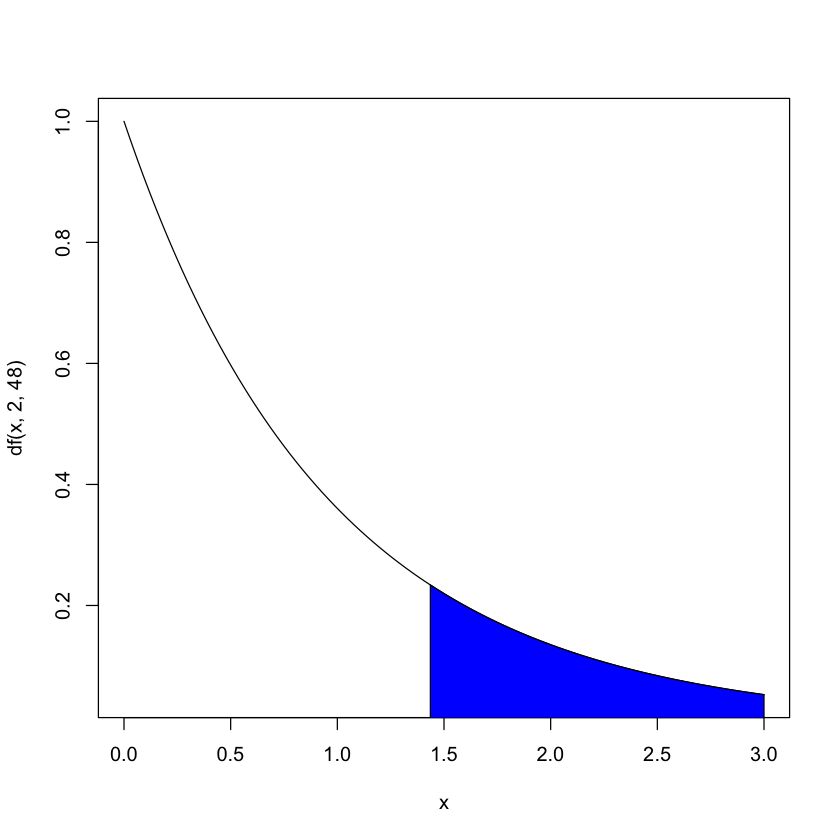

In [ ]:
# Slide 18-19:

R2<-1-det(matrix(c(1,0.158,0.12,0.158,1,-0.309,0.12,-0.309,1),nrow=3))/
      det(matrix(c(1,-0.309,-0.309,1),nrow=2))
R2

(R2/(1-R2))*48/2

# 1.436

1-pf((R2/(1-R2))*48/2,2,48)

#p=0.25

curve(df(x,2,48),0,3)
polygon(c((3000:1436)/1000,1436/1000,3,3),
        c(df((3000:1436)/1000,2,48),0,0,df(3,2,48)),
        col="blue")

[1] "hdata"      "heptathlon" "vintages"   "wines"

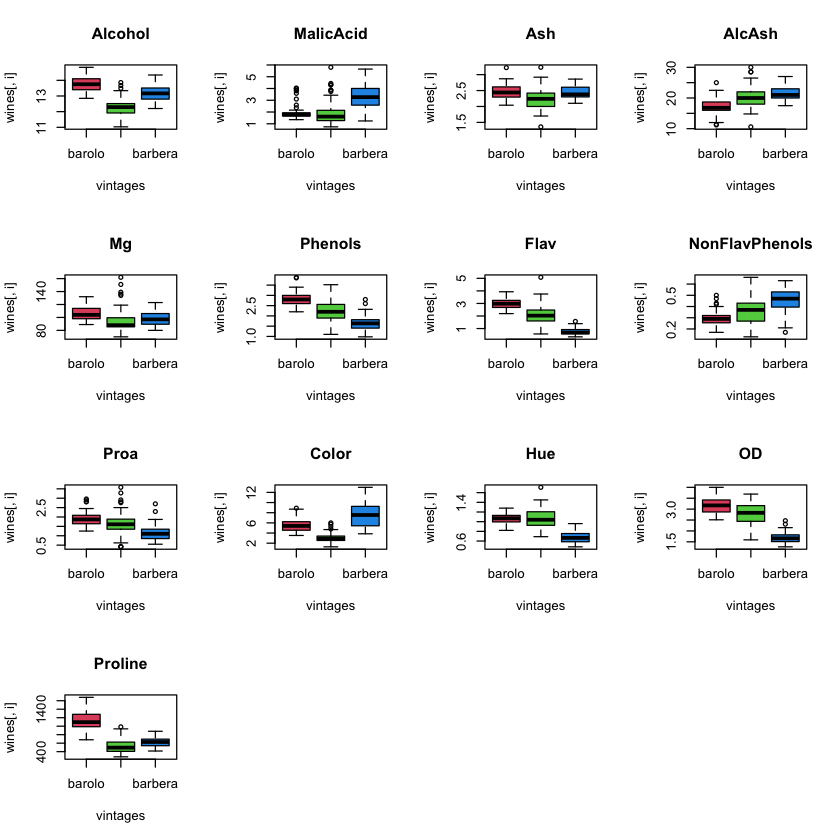

In [ ]:
# Slide 21:
# reading in data:
load("../data/Winedata.Rdata")

# two objects: wines, with characteristics, and vintages the wine type.
ls()

#Slide 22:
par(mfrow = c(4,4))
for (i in 1:13) boxplot(wines[,i] ~ vintages, col = 2:4, 
                        main=paste(names(wines)[i]))
par(mfrow = c(1,1))

Warning message:
"pakke 'car' blev bygget under R version 4.3.3"
Indlaeser kraevet pakke: carData



,Alcohol,MalicAcid,Ash,AlcAsh,Mg,Phenols,Flav,NonFlavPhenols,Proa,Color,Hue,OD,Proline
Alcohol,0.66,0.09,0.05,-0.84,3.14,0.15,0.19,-0.02,0.06,1.03,-0.01,0.04,164.57
MalicAcid,0.09,1.25,0.05,1.08,-0.87,-0.23,-0.46,0.04,-0.14,0.64,-0.14,-0.29,-67.55
Ash,0.05,0.05,0.08,0.41,1.12,0.02,0.03,0.01,0.00,0.16,0.00,0.00,19.32
AlcAsh,-0.84,1.08,0.41,11.15,-3.97,-0.67,-1.17,0.15,-0.38,0.15,-0.21,-0.66,-463.36
Mg,3.14,-0.87,1.12,-3.97,203.99,1.92,2.79,-0.46,1.93,6.62,0.18,0.67,1769.16
Phenols,0.15,-0.23,0.02,-0.67,1.92,0.39,0.54,-0.04,0.22,-0.08,0.06,0.31,98.17
Flav,0.19,-0.46,0.03,-1.17,2.79,0.54,1.00,-0.07,0.37,-0.40,0.12,0.56,155.45
NonFlavPhenols,-0.02,0.04,0.01,0.15,-0.46,-0.04,-0.07,0.02,-0.03,0.04,-0.01,-0.04,-12.20
Proa,0.06,-0.14,0.00,-0.38,1.93,0.22,0.37,-0.03,0.33,-0.03,0.04,0.21,59.55
Color,1.03,0.64,0.16,0.15,6.62,-0.08,-0.40,0.04,-0.03,5.37,-0.28,-0.71,230.77


,Alcohol,MalicAcid,Ash,AlcAsh,Mg,Phenols,Flav,NonFlavPhenols,Proa,Color,Hue,OD,Proline
Alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
MalicAcid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
AlcAsh,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
Mg,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
Phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
Flav,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
NonFlavPhenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
Proa,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
Color,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


[1] 13

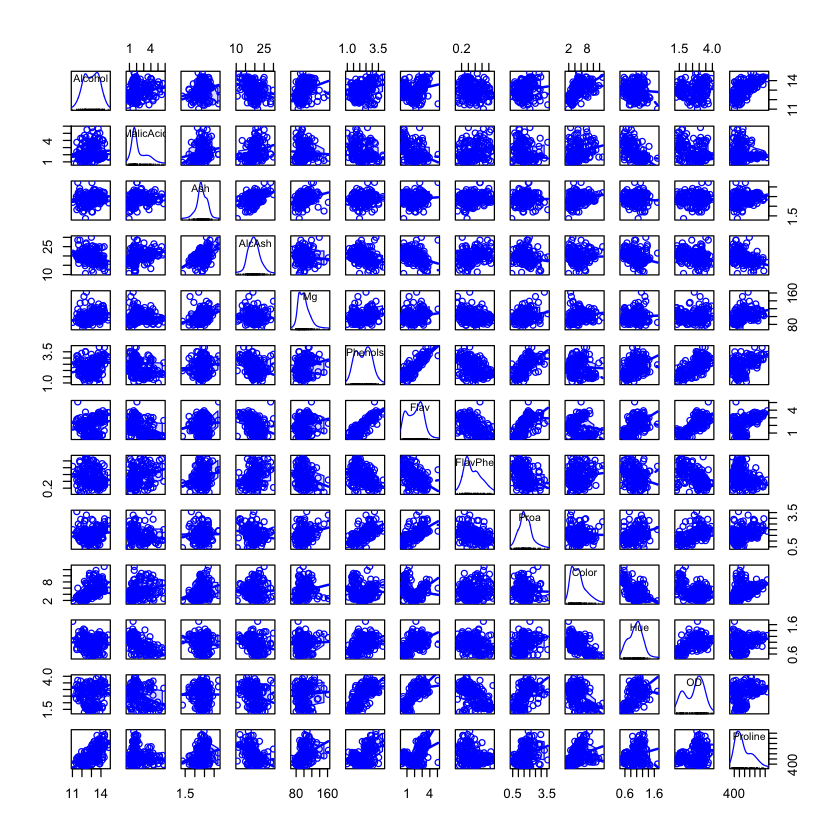

In [ ]:
# Slide 23:
library(car)
scatterplotMatrix(wines)

#slide 25:
# looking at variation:
round(var(wines),digits=2)

# Slide 26:
round(var(scale(wines)),digits=2)

# Slide 27:
Sigma<-var(scale(wines))

sum(diag(Sigma))

In [ ]:
# Slide 29:
T<-eigen(Sigma)$vectors

# The inverse of T is equal to the matrix transpose t(T):

Lambda<-t(T)%*%Sigma%*%T

round(Lambda, digits=2)

4.71,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,2.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,1.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.0


In [ ]:
# Slide 30:
T[,1]

[1] -0.144329395  0.245187580  0.002051061  0.239320405 -0.141992042
 [6] -0.394660845 -0.422934297  0.298533103 -0.313429488  0.088616705
[11] -0.296714564 -0.376167411 -0.286752227

In [ ]:
# Slide 31:
round(T[,1],digits=2)

[1] -0.14  0.25  0.00  0.24 -0.14 -0.39 -0.42  0.30 -0.31  0.09 -0.30 -0.38
[13] -0.29

In [ ]:
# Slide 32:
round(T[,1]*sqrt(diag(var(wines))),digits=2)

Alcohol      MalicAcid            Ash         AlcAsh             Mg 
         -0.12           0.27           0.00           0.80          -2.03 
       Phenols           Flav NonFlavPhenols           Proa          Color 
         -0.25          -0.42           0.04          -0.18           0.21 
           Hue             OD        Proline 
         -0.07          -0.27         -90.30

In [ ]:
# Slide 17:
sum(diag(Lambda))

[1] 13

Eigenvectors,Variance.Explained
<int>,<dbl>
1,36
2,55
3,67
4,74
5,80
6,85
7,89
8,92
9,94


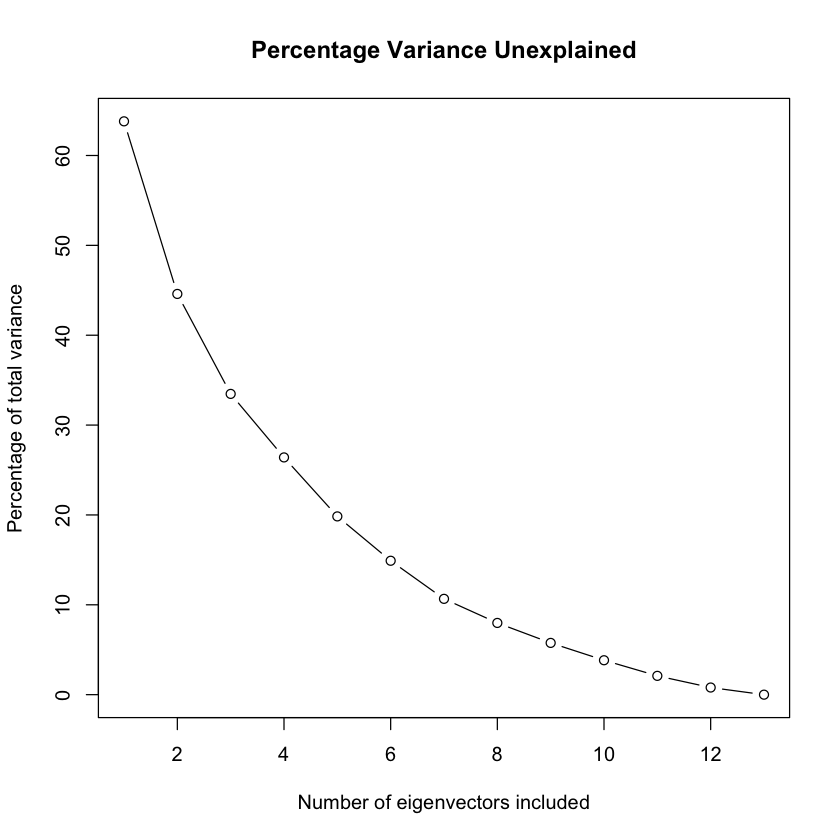

In [ ]:
# Slide 18:

plot(100*(13-cumsum(diag(Lambda)))/13,type="b",main="Percentage Variance Unexplained",
      xlab='Number of eigenvectors included',
      ylab='Percentage of total variance')

data.frame("Eigenvectors"=1:13,"Variance Explained"=round(100*(cumsum(diag(Lambda)))/13))

In [ ]:
# Slide 44:
install.packages("remotes")
library(remotes)
install_github("rwehrens/ChemometricsWithR")

library(ChemometricsWithR)
wines.PC<- PCA(scale(wines))
names(wines.PC)
summary(wines.PC)


The downloaded binary packages are in
	/var/folders/7x/nmv5t4fj6z51p0khdp74mzf00000gn/T//RtmpA4O2ka/downloaded_packages


Using GitHub PAT from the git credential store.

Skipping install of 'ChemometricsWithR' from a github remote, the SHA1 (9d15f509) has not changed since last install.
  Use `force = TRUE` to force installation



[1] "scores"        "loadings"      "var"           "totalvar"     
[5] "centered.data"


PCA model of a mean-centered matrix of 178 by 13
Number of PCs to cover 90 percent of the variance: 8

            Var Cumul. var.
PC 1  36.198848    36.19885
PC 2  19.207490    55.40634
PC 3  11.123631    66.52997
PC 4   7.069030    73.59900
PC 5   6.563294    80.16229
PC 10  1.930019    96.16972


In [ ]:
# Slide 45:

head(wines.PC$loadings,n=3)
head(T,n=3)

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
Alcohol,-0.144329395,-0.4836515,-0.20738262,-0.0178563,0.26566365,-0.2135386,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
MalicAcid,0.245187580,-0.2249309,0.08901289,0.5368903,-0.03521363,-0.5368138,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.3160688,0.62622390,-0.2141756,0.14302547,-0.1544747,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803


-0.144329395,-0.4836515,-0.20738262,-0.0178563,0.26566365,0.2135386,0.05639636,0.39613926,0.50861912,0.21160473,-0.22591696,-0.26628645,-0.01496997
0.245187580,-0.2249309,0.08901289,0.5368903,-0.03521363,0.5368138,-0.42052391,0.06582674,-0.07528304,-0.30907994,0.07648554,0.12169604,-0.02596375
0.002051061,-0.3160688,0.62622390,-0.2141756,0.14302547,0.1544747,0.14917061,-0.17026002,-0.30769445,-0.02712539,-0.49869142,-0.04962237,0.14121803


In [ ]:
# Slide 46:

head(wines.PC$scores,n=3)
head(scale(wines)%*%T,n=3)

PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13
-3.307421,-1.4394023,-0.1652728,-0.2150246,-0.6910933,-0.2232504,0.59474883,0.06495586,-0.6396384,-1.0180840,0.4502932,-0.5392891439,0.066052305
-2.203250,0.3324551,-2.0207571,-0.2905387,0.2569299,-0.9245123,0.05362434,1.02153432,0.3079780,-0.1592521,0.1422560,-0.3871456499,-0.003626273
-2.509661,-1.0282507,0.9800541,0.7228632,0.2503270,0.5477310,0.42301218,-0.34324787,1.1745213,-0.1130420,0.2858665,-0.0005819316,-0.021655423


-3.307421,-1.4394023,-0.1652728,-0.2150246,-0.6910933,0.2232504,-0.59474883,-0.06495586,0.6396384,1.0180840,-0.4502932,0.5392891439,0.066052305
-2.203250,0.3324551,-2.0207571,-0.2905387,0.2569299,0.9245123,-0.05362434,-1.02153432,-0.3079780,0.1592521,-0.1422560,0.3871456499,-0.003626273
-2.509661,-1.0282507,0.9800541,0.7228632,0.2503270,-0.5477310,-0.42301218,0.34324787,-1.1745213,0.1130420,-0.2858665,0.0005819316,-0.021655423


In [ ]:
# Slide 47:

wines.PC$var
wines.PC$totalvar
wines.PC$centered.data

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7      PC 8 
4.7058503 2.4969737 1.4460720 0.9189739 0.8532282 0.6416570 0.5510283 0.3484974 
     PC 9     PC 10     PC 11     PC 12     PC 13 
0.2888799 0.2509025 0.2257886 0.1687702 0.1033779

[1] 13

[1] TRUE

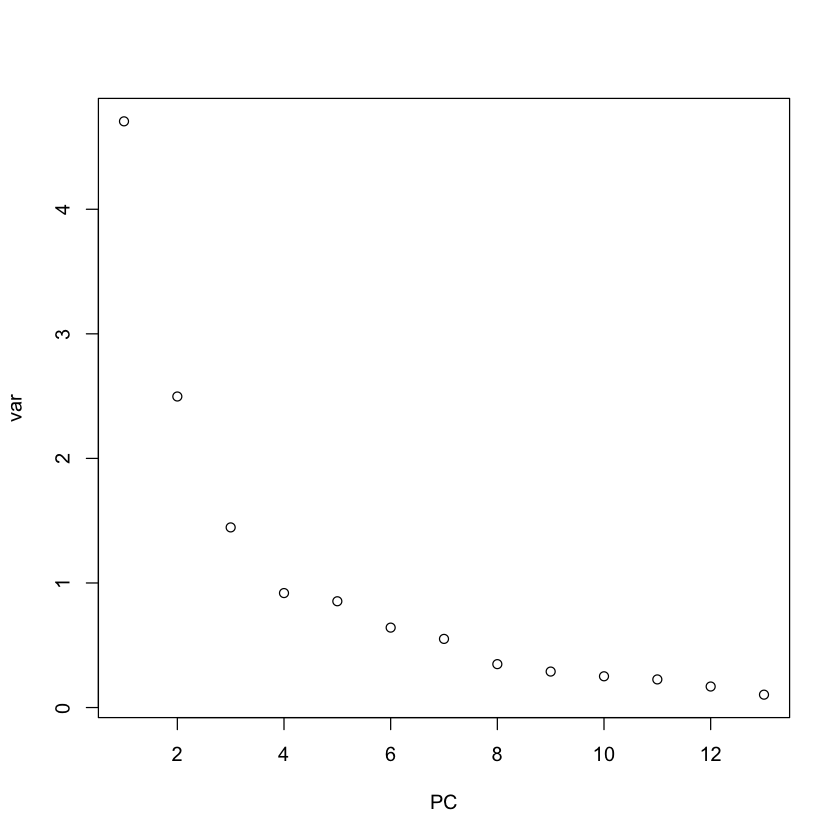

In [ ]:
# Slide 48:

plot(1:13,wines.PC$var,xlab="PC",ylab="var")

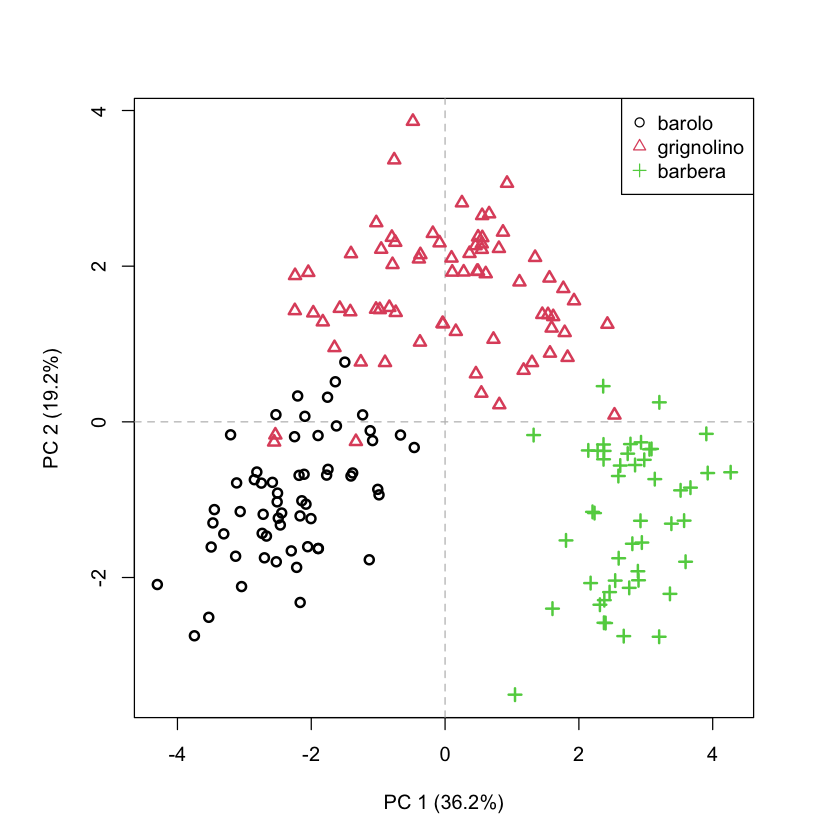

In [ ]:
# Slide 49:

scoreplot(wines.PC, col = vintages, pch= as.numeric(vintages), lwd=2)
legend("topright", levels(vintages), col=1:3,pch=1:3)

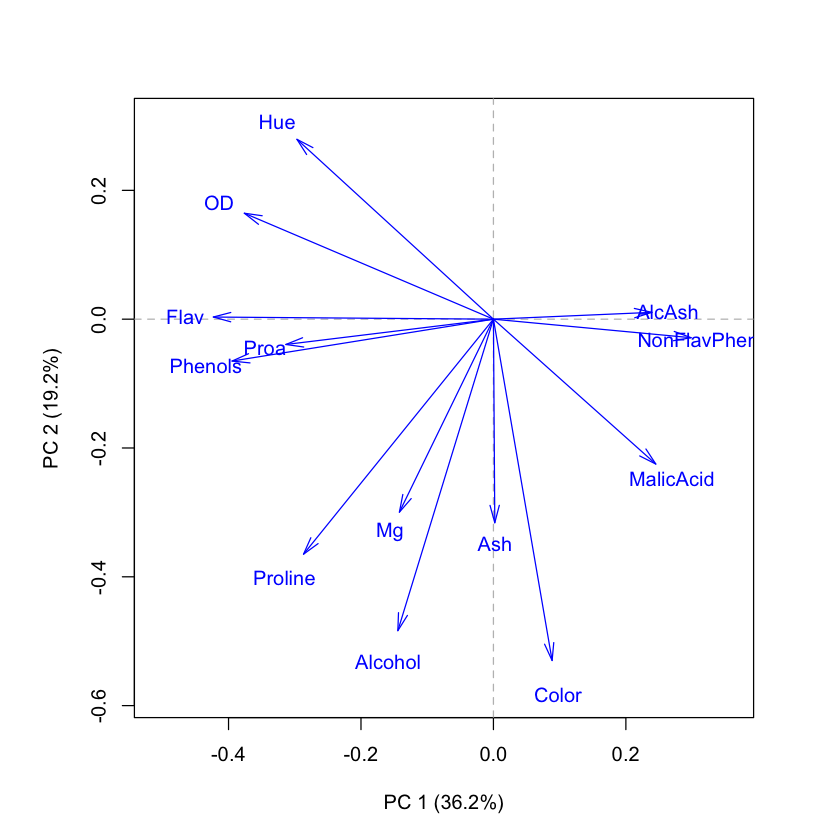

In [ ]:
# Slide 50:

loadingplot(wines.PC, show.names= TRUE)

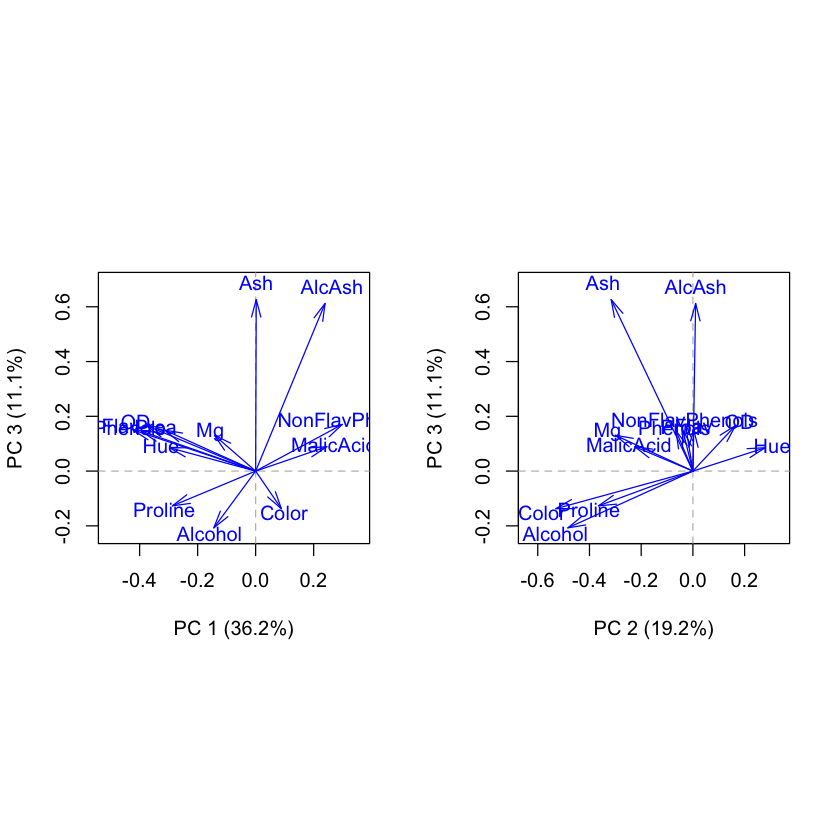

In [ ]:
# Slide 51:

par(mfrow=c(1,2))
loadingplot(wines.PC, pc=c(1,3), show.names= TRUE)
loadingplot(wines.PC, pc=c(2,3), show.names= TRUE)
par(mfrow=c(1,1))

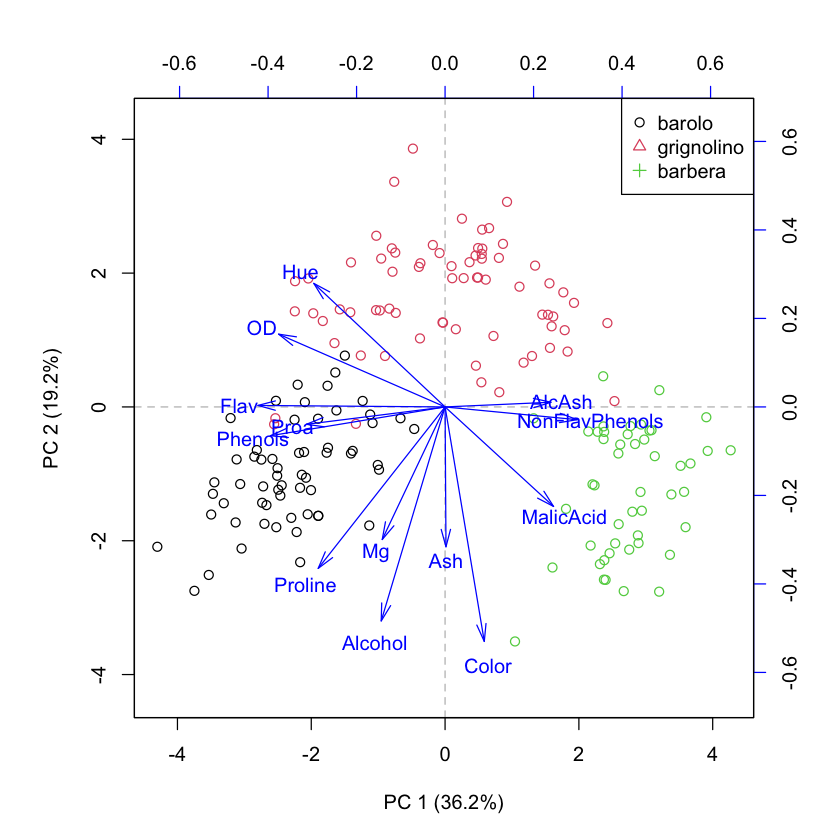

In [ ]:
# Slide 52:

biplot(wines.PC, score.col = vintages, show.names = "loadings")
legend("topright",levels(vintages), col=1:3,pch=1:3)


The downloaded binary packages are in
	/var/folders/7x/nmv5t4fj6z51p0khdp74mzf00000gn/T//RtmpA4O2ka/downloaded_packages


Warning message:
"pakke 'chemometrics' blev bygget under R version 4.3.3"
Indlaeser kraevet pakke: rpart



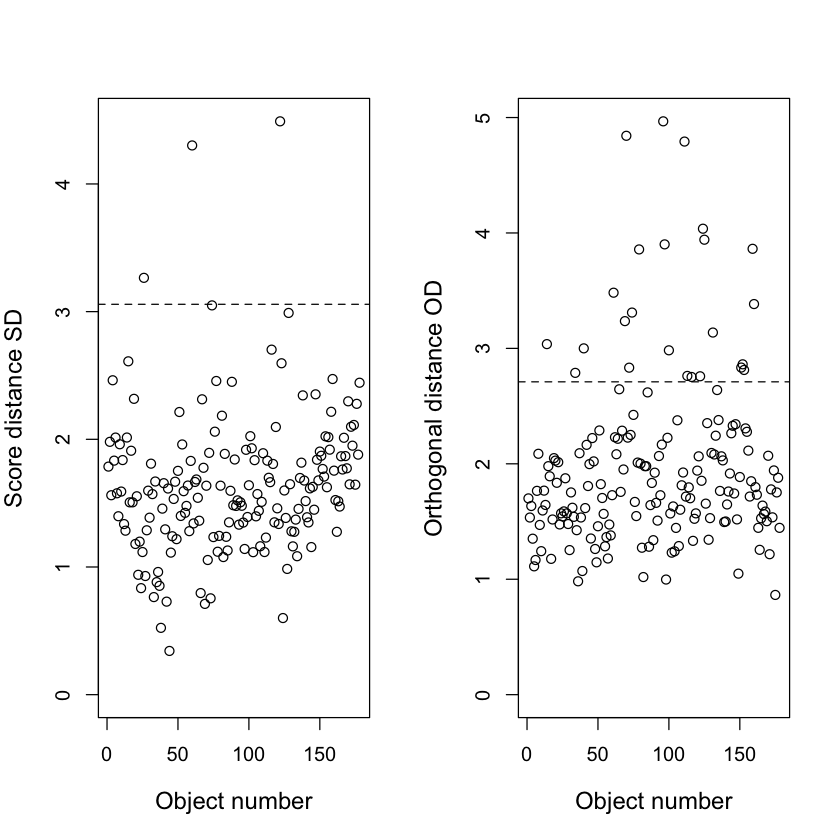

In [ ]:
# Slide 54:
install.packages("chemometrics")
library(chemometrics)
wines.PCA<- princomp(wines, cor = TRUE)
res<-pcaDiagplot(wines, wines.PCA, a=3)

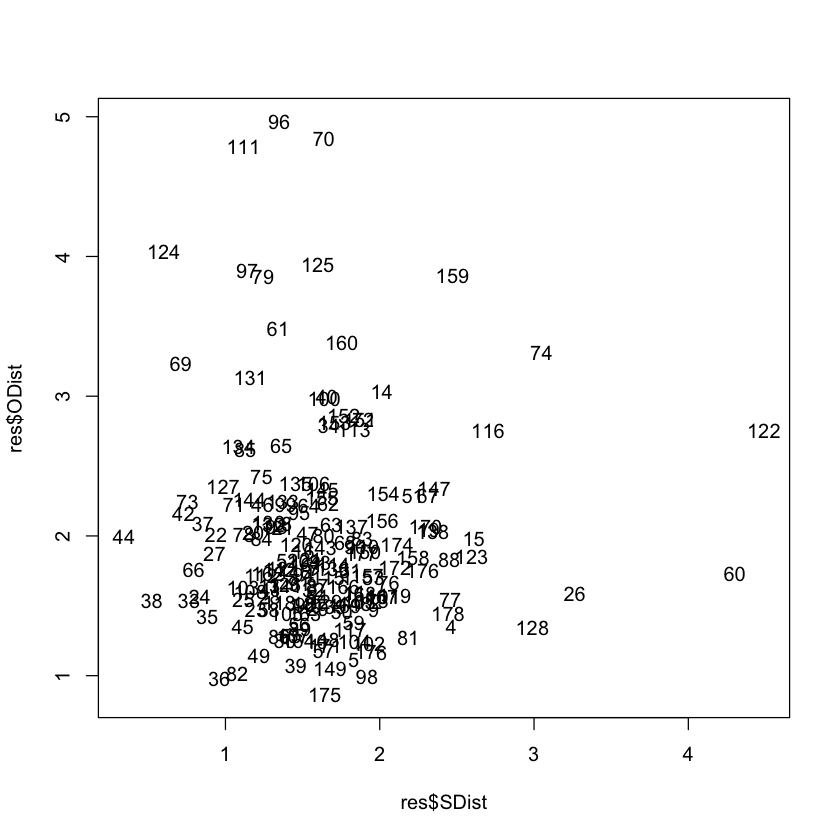

In [ ]:
# Slide 55:

par(mfrow=c(1,1))
plot(res$SDist, res$ODist, type="n")
text(res$SDist, res$ODist, labels=as.character(1:178))

In [ ]:
# Slide 57:

install.packages("png")
library(png)

pigs<-readPNG("../data/Picture2.png")

ncol(pigs)
## [1] 719
	
nrow(pigs)
## [1] 719

#719*719 pixels - 719*719*4=2067844 numbers

# array with 4 layers
str(pigs)

number1<-pigs[,,1]
number2<-pigs[,,2]
number3<-pigs[,,3]
number4<-pigs[,,4]

pigs.number1.pca <-  prcomp(number1, center = FALSE)
pigs.number2.pca <-  prcomp(number2, center = FALSE)
pigs.number3.pca <-  prcomp(number3, center = FALSE)
pigs.number4.pca <-  prcomp(number4, center = FALSE)

# Gather PCA object sin one list:
	
full.pca <- list(pigs.number1.pca,pigs.number2.pca,
                 pigs.number3.pca,pigs.number4.pca)



index<-c(3,6,9,12,15,18,50,100)
# function for reconstruction from pc (scores):

my.reconstruct<-function(j) {
    return(j$x[,1:i] %*% t(j$rotation[,1:i]))
  }
# reconstructs and writes to disc:

for (i in index) {
  pca.picture <- sapply(full.pca,my.reconstruct,simplify = 'array')
  writePNG(pca.picture, 
    paste("picture/pigs_compressed_", i, "_components.jpg", sep =""))
  }


The downloaded binary packages are in
	/var/folders/7x/nmv5t4fj6z51p0khdp74mzf00000gn/T//RtmpwBxbPD/downloaded_packages


[1] 719

[1] 719

 num [1:719, 1:719, 1:4] 0.267 0.2 0.267 0.267 0.267 ...


ERROR: Error in writePNG(pca.picture, paste("picture/pigs_compressed_", i, "_components.jpg", : unable to create picture/pigs_compressed_3_components.jpg


also installing the dependencies 'gtable', 'scales', 'patchwork', 'ggplot2', 'ggstats', 'S7'





The downloaded binary packages are in
	/var/folders/7x/nmv5t4fj6z51p0khdp74mzf00000gn/T//RtmpwBxbPD/downloaded_packages


Indlaeser kraevet pakke: ggplot2

Warning message:
"pakke 'ggplot2' blev bygget under R version 4.3.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Vedhaefter pakke: 'GGally'


Det folgende objekt er maskeret _af_ '.GlobalEnv':

    pigs




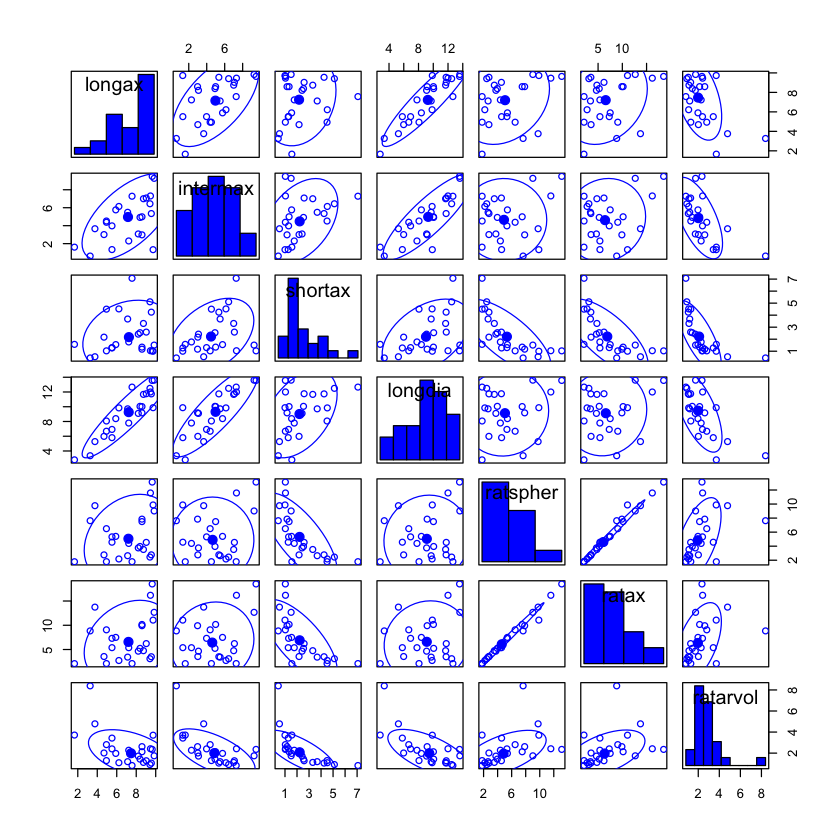

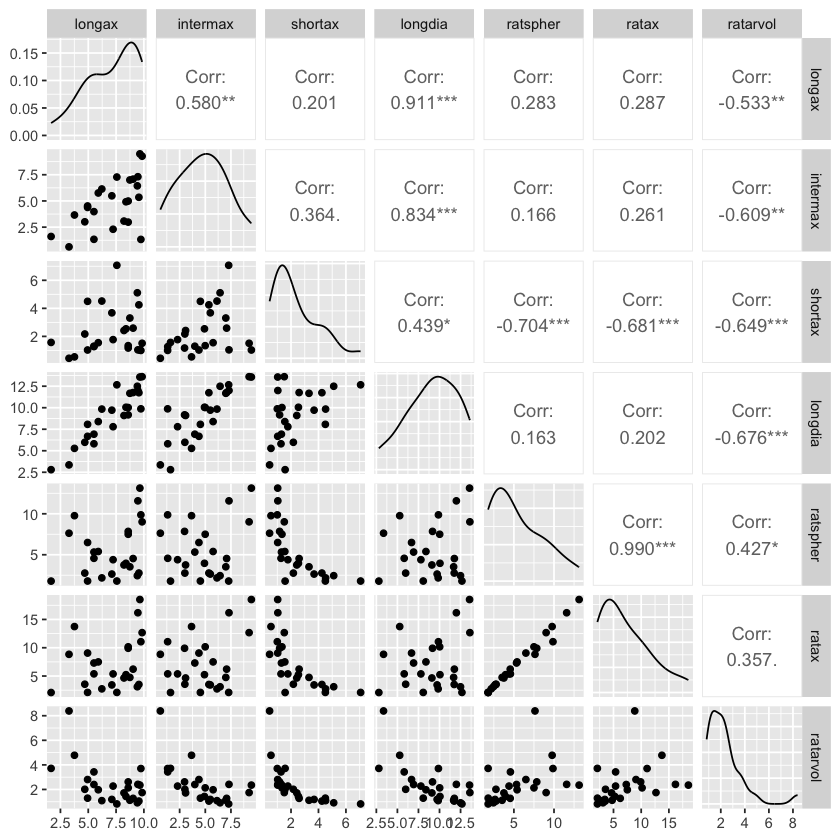

In [ ]:
# Slide 60:

BoxData <- read.csv2("../data/BoxData.csv")

library(car)

scatterplotMatrix(BoxData,regLine=F,smooth=F,
  ellipse=list(levels=0.9, robust=TRUE, fill=F),
  diagonal=list(method="histogram", breaks="FD"))

install.packages("GGally")
library(GGally)
ggpairs(BoxData)

In [ ]:
#Slide 61:

install.packages("rgl")
library(rgl)

plot3d( 
  x=BoxData$longax, y=BoxData$intermax, z=BoxData$longdia, 
  col = 2:4, 
  type = 's', 
  radius = .1,
  xlab="longax", ylab="intermax", zlab="longdia")

# Slide 62:

round(var(BoxData),digits=2)
round(cor(BoxData),digits=2)


The downloaded binary packages are in
	/var/folders/7x/nmv5t4fj6z51p0khdp74mzf00000gn/T//RtmpwBxbPD/downloaded_packages


,longax,intermax,shortax,longdia,ratspher,ratax,ratarvol
longax,5.40,3.26,0.78,6.39,2.16,3.04,-2.00
intermax,3.26,5.85,1.46,6.08,1.31,2.88,-2.37
shortax,0.78,1.46,2.77,2.20,-3.84,-5.17,-1.74
longdia,6.39,6.08,2.20,9.11,1.61,2.78,-3.28
ratspher,2.16,1.31,-3.84,1.61,10.71,14.77,2.25
ratax,3.04,2.88,-5.17,2.78,14.77,20.78,2.62
ratarvol,-2.00,-2.37,-1.74,-3.28,2.25,2.62,2.59


,longax,intermax,shortax,longdia,ratspher,ratax,ratarvol
longax,1.00,0.58,0.20,0.91,0.28,0.29,-0.53
intermax,0.58,1.00,0.36,0.83,0.17,0.26,-0.61
shortax,0.20,0.36,1.00,0.44,-0.70,-0.68,-0.65
longdia,0.91,0.83,0.44,1.00,0.16,0.20,-0.68
ratspher,0.28,0.17,-0.70,0.16,1.00,0.99,0.43
ratax,0.29,0.26,-0.68,0.20,0.99,1.00,0.36
ratarvol,-0.53,-0.61,-0.65,-0.68,0.43,0.36,1.00


[1] 34.491054532 18.998805551  2.538778135  0.805936662  0.340748842
[6]  0.033402945  0.002528452

[1] 6.028718e-01 3.320816e-01 4.437550e-02 1.408703e-02 5.955976e-03
[6] 5.838527e-04 4.419501e-05

[1] 0.6028718 0.9349534 0.9793289 0.9934160 0.9993720 0.9999558 1.0000000

0.16424686,-0.4220234,-0.64491387,0.09005725,0.22505173,-0.41495692,0.38478239
0.14209168,-0.4474204,0.71295468,0.04971923,0.39494928,-0.06640399,0.32932379
-0.17288104,-0.2567978,0.13009836,-0.62917765,-0.60715430,-0.27985985,0.21075836
0.16985314,-0.6495130,-0.14628480,-0.21213483,0.03294197,0.40280638,-0.56528237
0.54641008,0.1347857,-0.10531555,-0.16449070,-0.16115398,0.59607773,0.51365459
0.76826154,0.1332489,0.14871514,0.06207023,-0.20693001,-0.46484582,-0.32733525
0.07283692,0.3130121,-0.06518695,-0.71947348,0.59569676,-0.10694135,-0.09238892


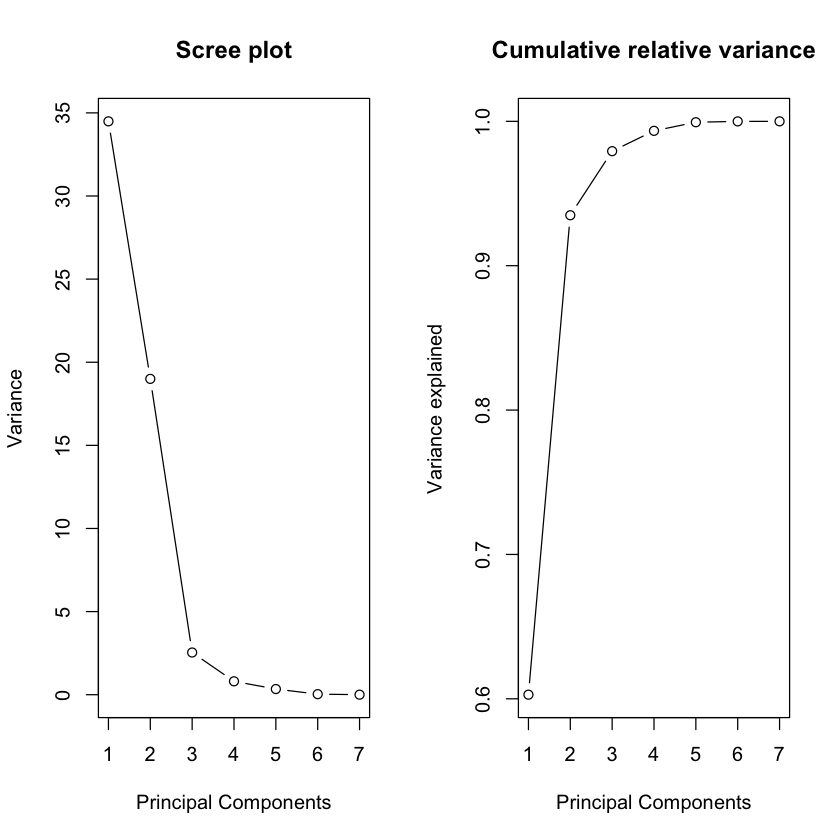

In [ ]:
# Slide 63:

eigen(var(BoxData))$values
eigen(var(BoxData))$values/sum(eigen(var(BoxData))$values)
cumsum(eigen(var(BoxData))$values/sum(eigen(var(BoxData))$values))
eigen(var(BoxData))$vectors

# Slide 64:

par(mfrow=c(1,2))
plot(1:7,eigen(var(BoxData))$values,type="b",xlab="Principal Components",
     ylab="Variance",main="Scree plot")

plot(1:7,cumsum(eigen(var(BoxData))$values)/
         sum(eigen(var(BoxData))$values),type="b",xlab="Principal Components",
     ylab="Variance explained",main="Cumulative relative variance")

In [ ]:
# Slide 65:

cor(BoxData,as.matrix(BoxData)%*%eigen(var(BoxData))$vectors)

PCA(BoxData)

cor(BoxData,eigen(var(BoxData))$vectors)

cor(BoxData,as.matrix(BoxData)%*%eigen(var(BoxData))$vectors)

longax,0.4150984,-0.7915902,-0.44219606,0.03479124,0.056532779,-0.032635943,0.008326133
intermax,0.3451469,-0.8066053,0.46984697,0.01846107,0.095354382,-0.005019595,0.006849086
shortax,-0.6095930,-0.6720379,0.12445822,-0.33912759,-0.212792176,-0.030709473,0.006362848
longdia,0.3305472,-0.9381185,-0.07723574,-0.06310578,0.006371966,0.024394697,-0.009418885
ratspher,0.9803705,0.1794837,-0.05126526,-0.04511387,-0.028739322,0.033282318,0.007890724
ratax,0.9898732,0.1274219,0.05198581,0.01222506,-0.026500734,-0.018638826,-0.003611082
ratarvol,0.2656095,0.8471555,-0.06449290,-0.40105519,0.215914259,-0.012136038,-0.002884604


Warning message in PCA(BoxData):
"Performing PCA on a non-meancentered data matrix!"


$scores
         PC 1       PC 2        PC 3        PC 4        PC 5        PC 6
1  -16.542761 -9.1422785 -0.02304759  2.16738253  0.80567857 -0.39413987
2  -18.994400 -1.6905825  0.20497665 -1.11734804 -0.10473897 -0.17401497
3  -13.002672  5.9520782  0.18784678  1.55654116  0.27896245  0.17204143
4  -15.397296  9.2327117 -0.11157405  2.14264015  1.39870488  0.16957936
5  -17.907566  3.8833646  0.80334754 -0.30896313 -1.04542715  0.08099486
6  -13.455311 -1.4345694 -0.11317710  0.37025278 -0.21674902 -0.14408480
7  -11.657773 -7.6855154 -5.07557593  2.79816024 -0.79567831  0.16570654
8  -16.716848  5.3439802  0.52252058  0.03103853 -0.83197943  0.06951079
9  -28.849396 -6.4491659  3.86539773  0.35660726  0.34073269  0.14162322
10 -19.743745 -4.3227081 -3.14773882 -2.99171864  0.88869481  0.54407474
11 -17.946730 -2.6789696 -1.29100734 -1.92776303  0.38273686 -0.06722820
12 -13.536435  5.0439640 -0.19290728  0.45179697 -0.10704253 -0.03774039
13  -9.609812  1.4604093 -1.02904425  0.542

ERROR: Error in cor(BoxData, eigen(var(BoxData))$vectors): incompatible dimensions


In [ ]:
# Slide 70:

cbind(eigen(cor(BoxData))$values,
eigen(cor(BoxData))$values/7,
cumsum(eigen(cor(BoxData))$values/7))

lambdastar<-mean(eigen(cor(BoxData))$values[6:7])

-dim(BoxData)[1]*log( prod(eigen(cor(BoxData))$values[6:7])/(lambdastar^2))

# 33.13

1-pchisq(33.14,df=2)

# p=0.0000006

3.3946422458,4.849489e-01,0.4849489
2.8054776509,4.007825e-01,0.8857314
0.4373108001,6.247297e-02,0.9482044
0.2779472286,3.970675e-02,0.9879111
0.0809525463,1.156465e-02,0.9994758
0.0034070609,4.867230e-04,0.9999625
0.0002624674,3.749534e-05,1.0000000


[1] 33.14026

[1] 6.36415e-08